# GRIP : The Sparks Foundation

### Data Science and Bussiness Analytics Intern

### Author : Arshi Fatima

Task 2 : Prediction using Unsupervised Machine Learning (K-Means Clustering) - Iris Dataset

Dataset - https://bit.ly/3kXTdox

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Inporting Dataset

In [4]:
# Load the iris dataset

iris_df = pd.read_csv('iris.csv')
iris_df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Exploratory Data Analysis

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# Unique Categories of Species Columns

iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot:>

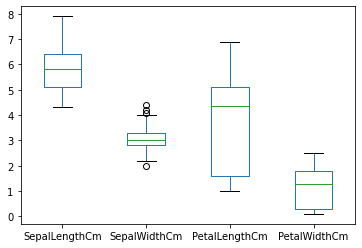

In [15]:
# Univariate Analysis

iris_df.drop('Id',axis=1).plot(kind='box')

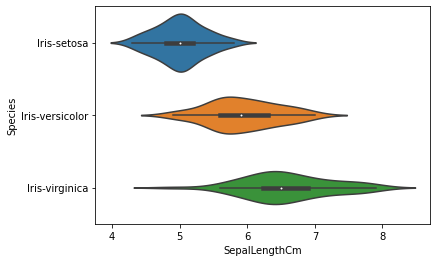

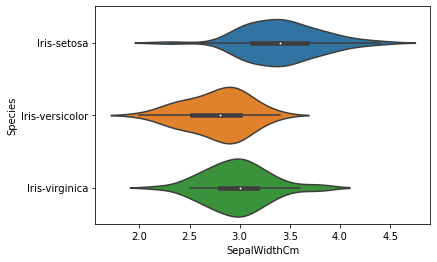

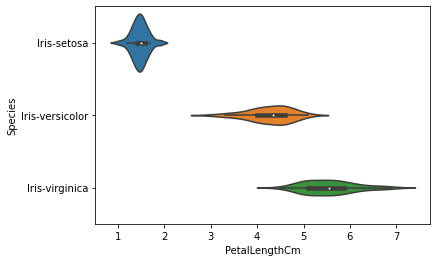

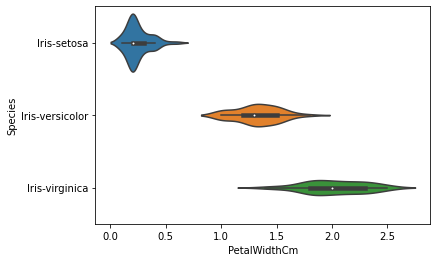

In [19]:
# Bivariate Analysis

for i in iris_df.columns:
    if i not in ['Id', 'Species']:
        sns.violinplot(x=iris_df[i], y=iris_df['Species'])
        plt.show()

### Model Building

#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

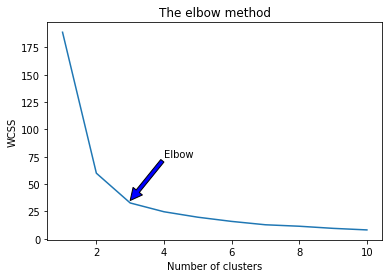

In [20]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [1,4]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.annotate('Elbow', xytext = (4,75), xy =(3, 35), arrowprops = {"facecolor" : "blue"})
plt.show()

By the help of 'Elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **"3"**.

In [ ]:
## Building model using optimal number of Clusters i.e. 3

In [24]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [23]:
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 2 0 1 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 0 2 1 2 1 2 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 1 1
 1 2]


#### Visualising the clusters - On the first two columns

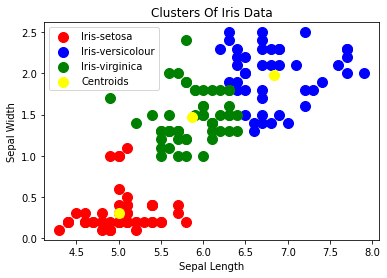

In [26]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters Of Iris Data')
plt.xlabel('Sepal Length', fontsize = 10)
plt.ylabel('Sepal Width', fontsize = 10)
plt.legend()

## Thus, we have predicted the number  of clusters are '3' and represented it visually.